### **Student Information**  

Gideon Shahar  

Noy Rahmani  
311124416

In [1]:
# imports

from pathlib import Path

import cv2
import numpy as np
import matplotlib.pyplot as plt


data_folder = Path("./data")

In [2]:
# set matplotlib to show images nicely
%matplotlib inline
plt.rcParams['figure.figsize'] = (4, 4)

### Question 3 — Coin Detection in Mario Maps
#### You are given several Mario map images that contain multiple coins scattered in the scene. Your task is to detect these coins using template matching techniques.


1. **Smart Coin Cropping (Pre‑processing)**  
- Select one clear coin from the map.  
- Crop it smartly and manually (tight bounding box, centered, minimal background).  
- You may apply:  
    - Contrast enhancement  
    - Histogram equalization  
    - Smoothing or sharpening filters  
- Explain why your cropping is effective and how it improves template matching.


In [3]:
# load image
imname = "mario-bonusarea-a.png"
img = cv2.imread(data_folder / imname)

In [ ]:
# crop coin and save it (optional)
coin_roi = cv2.selectROI("Select Coin and press ENTER", img, False)
coin_img = img[coin_roi[1]:coin_roi[1]+coin_roi[3], coin_roi[0]: coin_roi[0]+coin_roi[2]]
cv2.destroyAllWindows()
cv2.imwrite(data_folder / 'coin.png', coin_img)

True

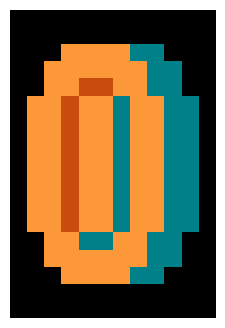

In [ ]:
# draw coin
coin_img = cv2.imread(data_folder / 'coin.png')
coin_img_rgb = cv2.cvtColor(coin_img, cv2.COLOR_BGR2RGB)
plt.imshow(coin_img_rgb)  
plt.axis('off')  
plt.show()

We choose not to apply histogram equalization or other image variations.  
Our coin image is an RGB image, so we don't want to harm the colors when applying histogram equalization. Also, it has a good contrast and it is very detailed.

2. **Template Matching Methods**  
Implement and test the following three similarity measures:  
- SAD — Sum of Absolute Differences  
- SSD — Sum of Squared Differences  
- ZNCC — Zero‑mean Normalized Cross‑Correlation  
For each method, you must:
- Apply it on each Mario map.  
- Detect all possible coin locations.  
- Mark the detected coins visually on the image (e.g., bounding box / circle).  
- Discuss positives and negatives of each method:  
    - Sensitivity to lighting
    - Sensitivity to contrast
    - When it fails and why